# Clustering Metrics

## Loading Packages

In [7]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd
import numpy as np
import scanpy as sc
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, normalized_mutual_info_score

## Loading Data

In [31]:
## results for three methods under different noise levels
adata_results_noised = sc.read_h5ad("../../../Mouse_Thymus_Noised.h5ad")
print(adata_results_noised)

## original results
adata_results = sc.read_h5ad("../../../Mouse_Thymus_Replicate1.h5ad")
print(adata_results)

AnnData object with n_obs × n_vars = 4183 × 0
    obs: 'SpatialGlue_level_1', 'SpatialGlue_level_2', 'SpatialGlue_level_3', 'SpaKnit_level_1', 'SpaKnit_level_2', 'SpaKnit_level_3', 'MultiMAP_level_1', 'MultiMAP_level_2', 'MultiMAP_level_3'
    uns: 'MultiMAP_level_1_colors', 'MultiMAP_level_2_colors', 'MultiMAP_level_3_colors', 'SpaKnit_level_1_colors', 'SpaKnit_level_2_colors', 'SpaKnit_level_3_colors', 'SpatialGlue_level_1_colors', 'SpatialGlue_level_2_colors', 'SpatialGlue_level_3_colors'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 4183 × 0
    obs: 'SpaKnit', 'SpatialGlue', 'STAGATE', 'Modality1', 'Modality2', 'SpaGCN', 'MultiMAP', 'MultiVI', 'Seurat'
    uns: 'MultiMAP_colors', 'Seurat_colors'
    obsm: 'Modality1', 'Modality2', 'MultiMAP', 'MultiVI', 'STAGATE', 'Seurat', 'SpaKnit', 'SpatialGlue', 'spatial'


## Calculating Metrics

In [ ]:
methods = ['SpaKnit', 'SpatialGlue', 'MultiMAP']
levels = ['level_1', 'level_2', 'level_3']

# 初始化结果存储
results = []

# 遍历每种方法和层次
for method in methods:
    for level in levels:
        # 提取真实标签和预测标签
        true_labels = adata_results.obs[method]  # 真实标签
        pred_labels = adata_results_noised.obs[f"{method}_{level}"]  # 预测标签
        
        # 计算指标
        ari = adjusted_rand_score(true_labels, pred_labels)
        ami = adjusted_mutual_info_score(true_labels, pred_labels)
        nmi = normalized_mutual_info_score(true_labels, pred_labels)
        
        # 存储结果
        results.append({
            'Method': method,
            'Level': level,
            'ARI': ari,
            'AMI': ami,
            'NMI': nmi
        })

# 将结果转换为DataFrame
results_df = pd.DataFrame(results)

# 打印结果
print(results_df)

        Method    Level       ARI       AMI       NMI
0      SpaKnit  level_1  0.319763  0.446140  0.447533
1      SpaKnit  level_2  0.180623  0.346918  0.348702
2      SpaKnit  level_3  0.250694  0.361333  0.362970
3  SpatialGlue  level_1  0.227981  0.220949  0.223135
4  SpatialGlue  level_2 -0.004561  0.010486  0.013236
5  SpatialGlue  level_3 -0.000556  0.003481  0.006076
6     MultiMAP  level_1  0.030888  0.047189  0.049527
7     MultiMAP  level_2  0.013195  0.033981  0.036472
8     MultiMAP  level_3  0.007821  0.038593  0.041075


In [ ]:
# Organize the data for plotting
metrics_results = results_df.pivot(index='Method', columns='Level', values=['ARI', 'AMI', 'NMI'])
metrics_results.columns = [f"{metric}_{level}" for metric, level in metrics_results.columns]

# Extract the data
box_data = []
methods = ['SpaKnit', 'SpatialGlue', 'MultiMAP']  # Ensure the order of methods
for method in methods:
    for metric in ['ARI', 'AMI', 'NMI']:
        box_data.append([metrics_results.loc[method, f"{metric}_{level}"] for level in levels])

## Ploting

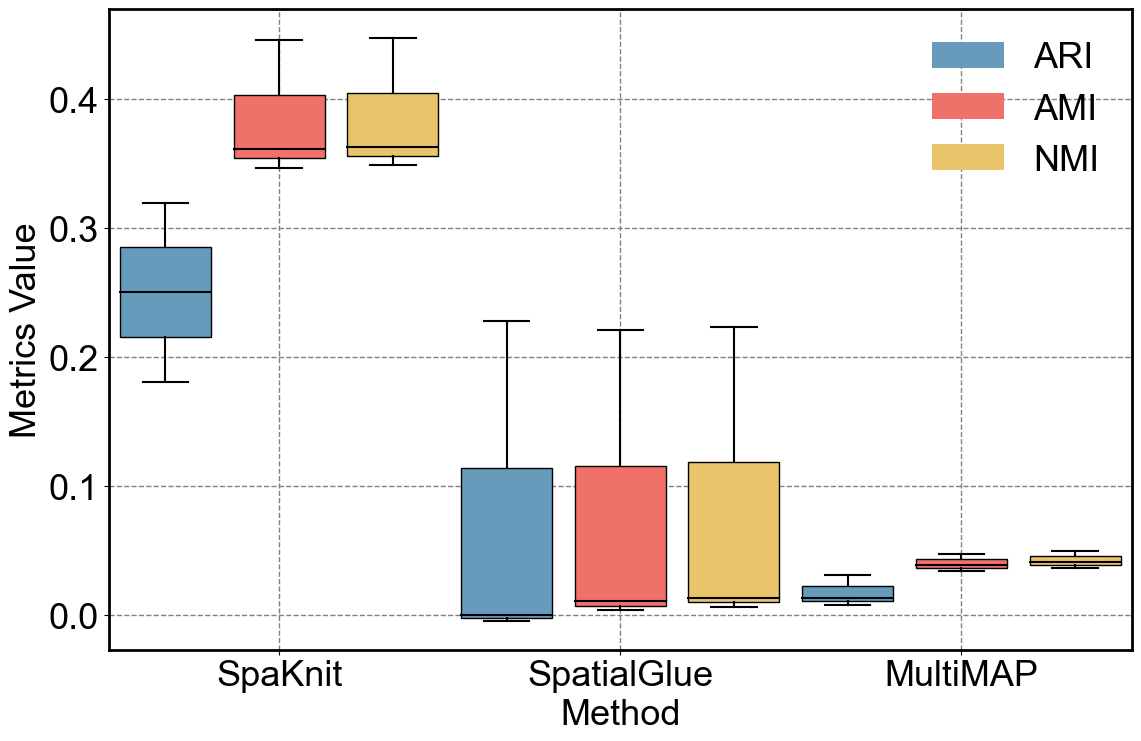

In [70]:
# Set the font size and font family for matplotlib
plt.rcParams.update({'font.size': 26, 'font.family': 'Arial'})
box_width = 0.8

# Create the boxplot
fig, ax = plt.subplots(figsize=(12, 8))
box = ax.boxplot(box_data, patch_artist=True, widths=box_width)

# Customize the style of the boxplot elements
for element in ['whiskers', 'caps', 'medians']:
    for elem in box[element]:
        elem.set_color('black')
        elem.set_linewidth(1.5)

# Set the colors for the boxes
colors = ['#669bbc', '#f07167', '#e9c46a'] * len(methods)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Set the x-axis tick labels
num_methods = len(methods)
num_metrics = 3
tick_positions = np.arange(2, num_methods * num_metrics + 1, num_metrics)
ax.set_xticks(tick_positions)
ax.set_xticklabels(methods)

plt.title('')  # Empty title
plt.xlabel('Method')
plt.ylabel('Metrics Value')

# Customize the thickness of the plot's border
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)

plt.grid(True, linestyle='--', color='gray', linewidth=1)

# Add the legend
legend_elements = [Patch(facecolor='#669bbc', label='ARI'),
                   Patch(facecolor='#f07167', label='AMI'),
                   Patch(facecolor='#e9c46a', label='NMI')]
ax.legend(handles=legend_elements, loc='upper right', frameon=False)

plt.tight_layout()

# Save the plot as PNG and EPS files
plt.savefig('Metrics of Three Methods.png', dpi=500)
plt.savefig('Metrics of Three Methods.eps')

plt.show()